In [ ]:
# set up the environment
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
from skimage import color

print("All set to go")

All set to go


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['bird.jpg', 'butterfly.jpg', 'edaha-chair-gamfratesi-koyori-design_dezeen_2364_sq (1).jpg', 'ladybug (1).jpg']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


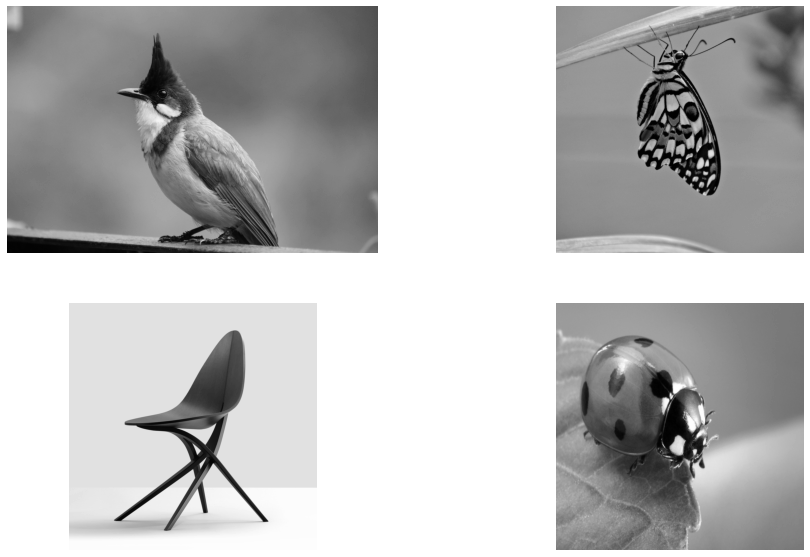

In [ ]:
# Copy all images to your Google drive and define appropriate path in the code below
# Mount the drive and get the images
# Allow colab to access your drive when prompted
from google.colab import drive
drive.mount('/content/drive/')
#drive.mount('https://drive.google.com/drive/folders/1nQeRnCEVbjbdFy89s3fDbjwjdrF3N8yK?usp=sharing', force_remount=True)
img_dir = "/content/drive/MyDrive/Colab-images"
flist = sorted([f for f in listdir(img_dir) if isfile(join(img_dir, f))])
print(flist)

fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
n = len(flist)
images_gray=[]
for i in range(n):
  fig.add_subplot(2,n//2,i+1)
  img_bgr = cv2.imread(join(img_dir,flist[i]),0)
  img_gray = color.rgb2gray(img_bgr) # Covert image to grayscale
  images_gray.append(img_gray[:,:])
  plt.imshow(img_gray,cmap='gray')
  plt.axis('off')



Natural Object

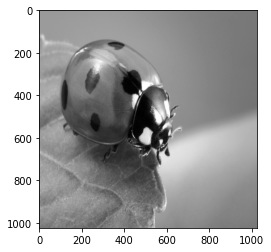

In [ ]:
# Choose any of the images
img_idx = 3  # use some index to choose your image
my_image = images_gray[img_idx]
plt.imshow(my_image, cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(-0.5, 1023.5, 1023.5, -0.5)

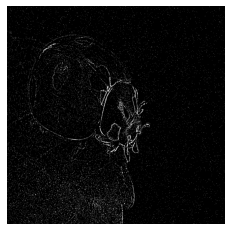

In [ ]:
#Create two Gausian with different std
high_sigma = cv2.GaussianBlur(my_image,(5,5),8,8)
low_sigma = cv2.GaussianBlur(my_image,(5,5),3,3)

# Calculate the DoG by subtracting
#dog = low_sigma - high_sigma
dog = high_sigma - low_sigma
img_gray = color.rgb2gray(dog)

plt.imshow(img_gray, cmap= "gray")
plt.axis('off')

Conclusion:
After applying tuning on the window size and std values, we have used the most optimised values.

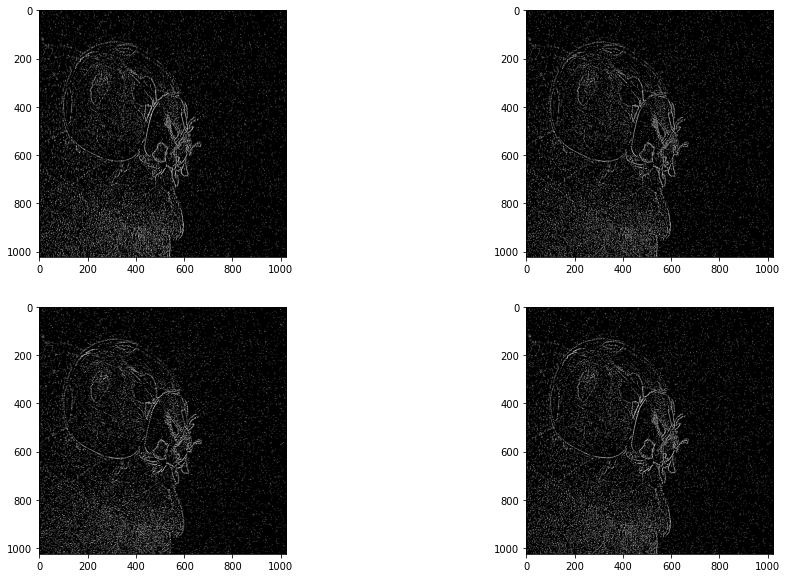

In [ ]:
# Now Detect edges in four orientation

# Define filters
filter000 = np.array([[-1,0,1],[-2,-0,2],[-1,0,1]])
filter045 = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
filter090 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filter135 = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])

edges000 = cv2.filter2D(src=img_gray, ddepth=-1, kernel=filter000)
edges045 = cv2.filter2D(src=img_gray, ddepth=-1, kernel=filter045)
edges090 = cv2.filter2D(src=img_gray, ddepth=-1, kernel=filter090)
edges135 = cv2.filter2D(src=img_gray, ddepth=-1, kernel=filter135)
# Plot edge images
edge_images = np.array([edges000, edges045, edges090, edges135])
import matplotlib.image as imgs
fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.imshow(edge_images[i],cmap='gray')
  #plt.axis('off')



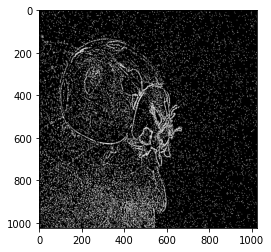

In [ ]:
#use the Maximun value of each pixel location out of 4 filter output..
d=np.maximum.reduce([edges000,edges045,edges090,edges135])
plt.imshow(d,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


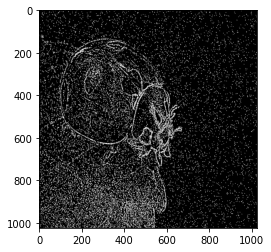

In [ ]:
# Now implement WTA and normalization and create the final image
# Show the final image
final_img_Natural=edges000+edges045+edges090+edges135
plt.imshow(final_img_Natural,cmap='gray')
jk=final_img_Natural/d
plt.imshow(jk,cmap='gray')



In [ ]:
#Experiments

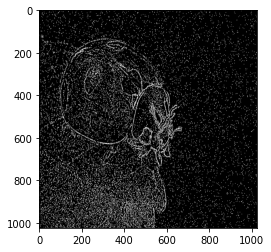

In [ ]:
# Experiments by dropping vertical filter
final_img_124=edges000+edges045+edges135
Final_im=final_img_124/255
plt.imshow(Final_im,cmap='gray')

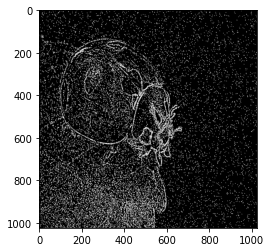

In [ ]:
# Experiments by dropping 45 degree filter
final_img_134=edges000+edges090+edges135
plt.imshow(final_img_134,cmap='gray')

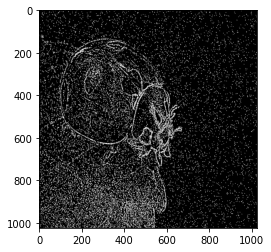

In [ ]:
# Experiments by dropping horizontal  filter
final_img_234=edges000+edges090+edges045+edges135
plt.imshow(final_img_234,cmap='gray')

Man Made Object

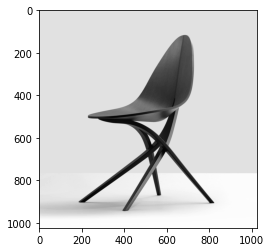

In [ ]:
img_idx = 2  # use some index to choose your image
my_image_2 = images_gray[img_idx]
plt.imshow(my_image_2, cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(-0.5, 1023.5, 1023.5, -0.5)

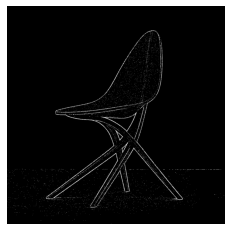

In [ ]:
# High std
high_sigma_2 = cv2.GaussianBlur(my_image_2,(5,5),8,8)
low_sigma_2 = cv2.GaussianBlur(my_image_2,(5,5),3,3)

# Calculate the DoG by subtracting
#dog = low_sigma - high_sigma
dog = high_sigma_2 - low_sigma_2
img_gray_2 = color.rgb2gray(dog)

plt.imshow(img_gray_2, cmap= "gray")
plt.axis('off')
# dst_2 = cv2.GaussianBlur(my_image_2,(7,7),8,8,cv2.BORDER_DEFAULT)
# plt.imshow(dst_2, cmap="gray")

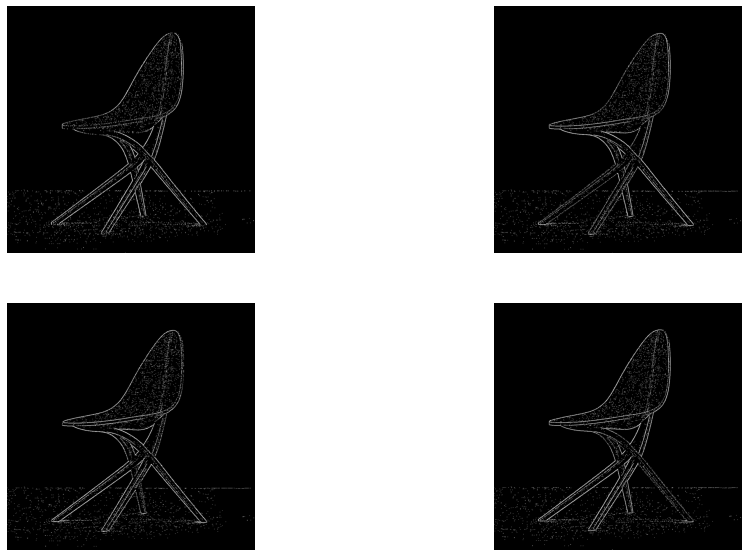

In [ ]:

edges000_2 = cv2.filter2D(src=img_gray_2, ddepth=-1, kernel=filter000)
edges045_2 = cv2.filter2D(src=img_gray_2, ddepth=-1, kernel=filter045)
edges090_2 = cv2.filter2D(src=img_gray_2, ddepth=-1, kernel=filter090)
edges135_2 = cv2.filter2D(src=img_gray_2, ddepth=-1, kernel=filter135)

# Plot edge images
edge_images = np.array([edges000_2, edges045_2, edges090_2, edges135_2])

fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.imshow(edge_images[i],cmap='gray')
  plt.axis('off')

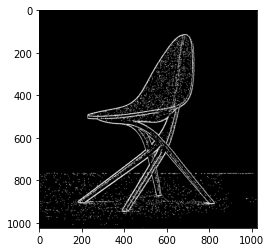

In [ ]:
d_2=np.maximum.reduce([edges000_2,edges045_2,edges090_2,edges135_2])
plt.imshow(d_2,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


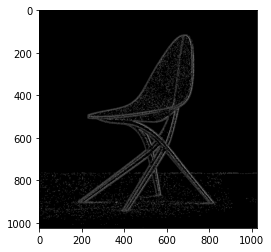

In [ ]:
final_img_Man_made=edges000_2+edges045_2+edges090_2+edges135_2
#Final_in=final_img_Natural/255
jk_2=final_img_Man_made/d_2
jk_2 = np.nan_to_num(jk_2)
plt.imshow(jk_2,cmap='gray')
